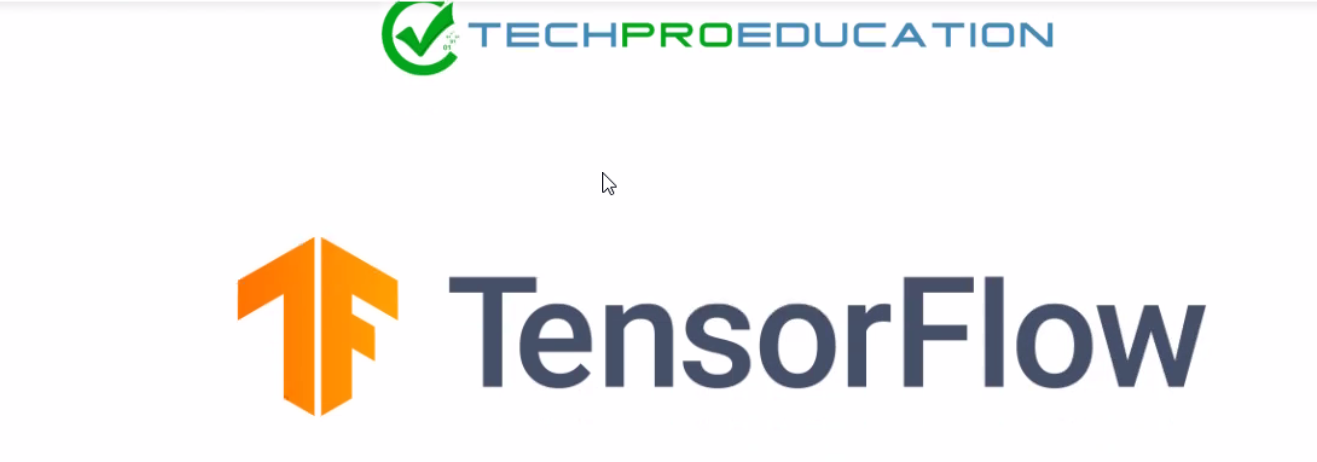

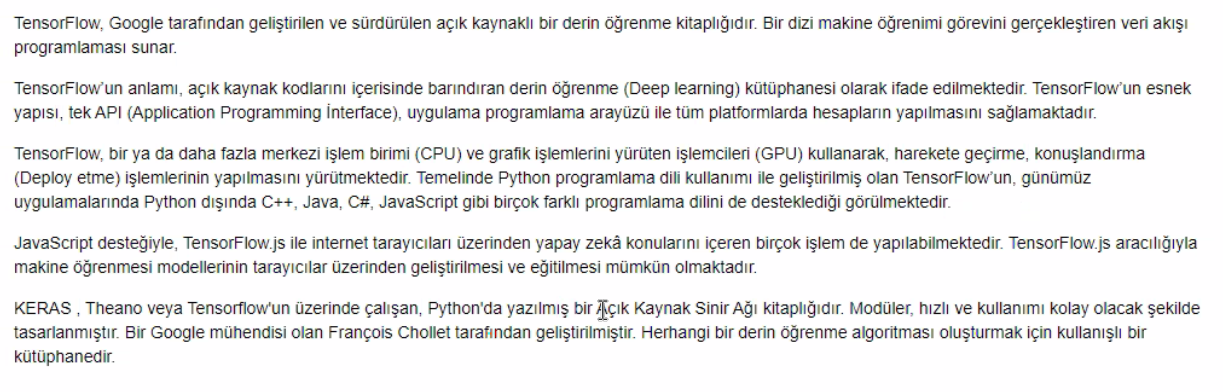

# Installing Tensorflow

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("fake_reg.csv")

eğitim için oluşturulmuş sentetik bir data

## Exploratory Data Analysis and Visualization

In [ ]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [ ]:
df.tail()

,price,feature1,feature2
995,476.526,1000.019,999.673
996,457.313,998.855,1000.020
997,456.721,1001.452,998.848
998,403.316,1000.771,998.563
999,599.367,999.232,1001.451


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


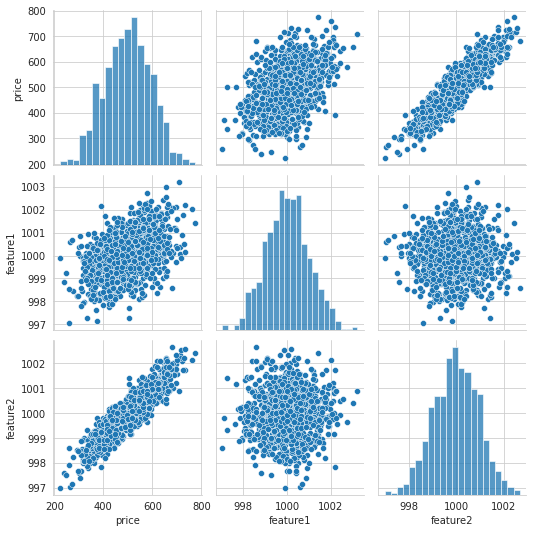

In [ ]:
sns.pairplot(df);

In [ ]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


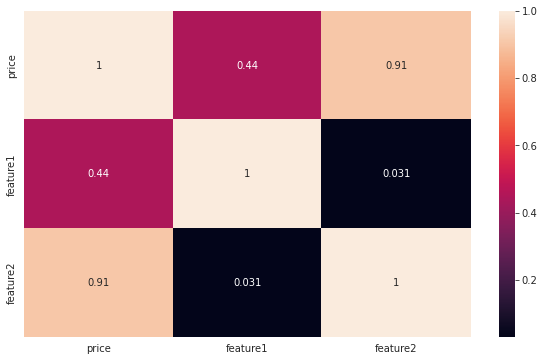

In [ ]:
sns.heatmap(df.corr(), annot=True);

## Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['feature1', 'feature2']].values  # Önemli! array olarak vereceğiz data setini df olarak vermiyoruz bu nedenle .values ile değerleri alıyoruz
y = df['price'].values

arrayler df lerden daha hızlı çalışıyor, DL de daha hızlı olmasına ihtiyaç duyduğumuz için arrayleri veriyoruz içine. Özellikle büyük datalarda array olarak kullanmak ciddi kolaylık. 

In [ ]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [ ]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape

(700, 2)

In [ ]:
X_test.shape

(300, 2)

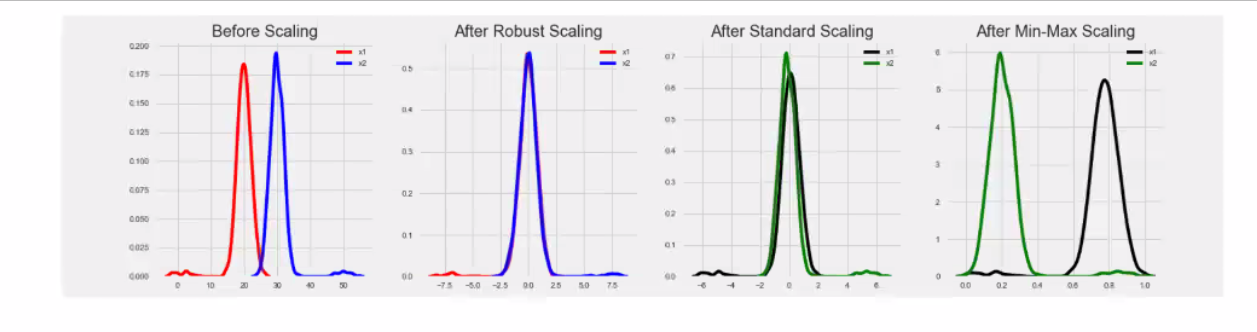

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [ ]:
scaler = MinMaxScaler() # Deep Learning de MinMax kullanmak daha iyidir!

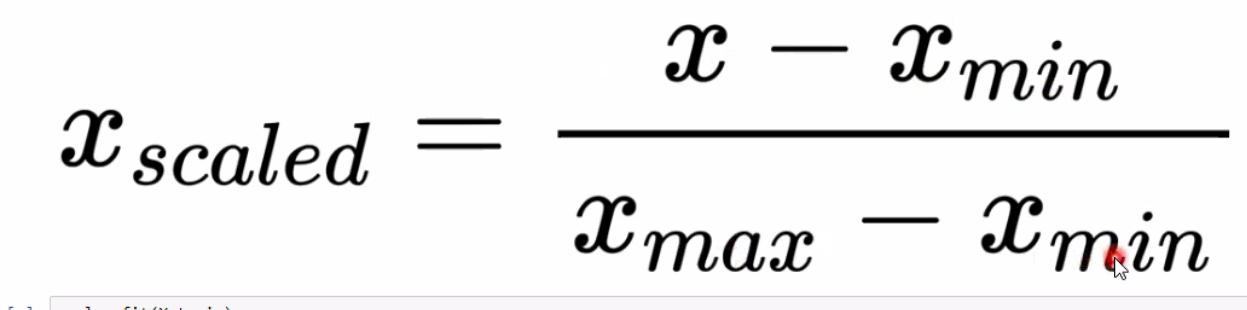

dar bir alana sıkıştırdığı için datayı, zaman maliyeti açısından avantaj sağlar

In [ ]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.max()

1.0

In [ ]:
X_train.min()

0.0

In [ ]:
X_test.max()   #train datasında scaler yaptığımızdan 0 ile 1 arasında değerler gelir  fakat test datasında 1 den büyük 0 dan küçük değerler olabilir

1.0186515935232023

In [ ]:
X_test.min()

-0.014108392024525074

train datası en büyük değeri 1'e en küçüğünü 0'a eşitliyor, eğer test datasında daha büyük ya da daha küçük değer varsa sınır değerlerinden 1'den büyük ya da 0'dan küçük değerler ortaya çıkabiliyor. 

## Modelling

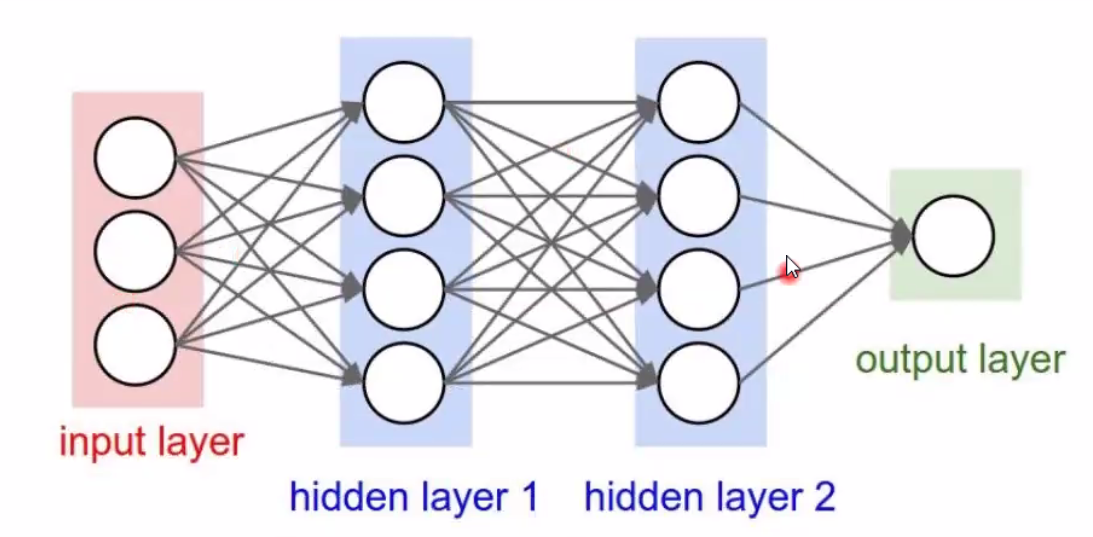

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

In [ ]:
from keras import models

In [ ]:
from tensorflow.keras.layers import Dense, Activation

In [ ]:
from tensorflow.keras.models import Sequential


In [ ]:
help(Sequential) # arka arka katman oluşturmamı sağlayan yapıdır. ilk olarak modeli squental olarak tanımlarız.

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

In [ ]:
help(Dense) # katman (layer) cinsi ANN'de en temal katman Dense'dir. fullyhelp(Dense) 
# katman (layer) cinsi ANN'de en temal katman Dense'dir. 
# fullyconnected layer oluşturmak için Dense kulanılır.

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every

In [ ]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),   # her bir dense bir layer'i  tanımlar 
                    Dense(units = 4, activation = "relu"),   # units kaç nöron olduğunu söyler fonksiyonuda Relu
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)]) #output layer

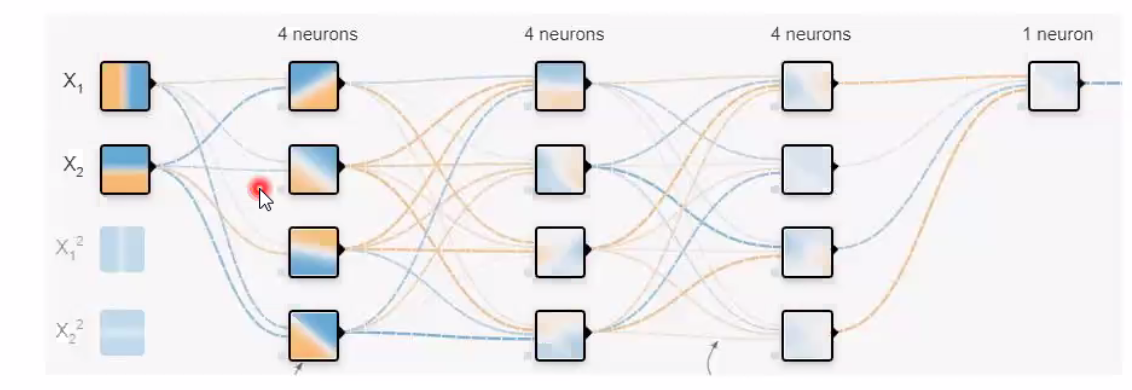

In [ ]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1)) # regression problemi olduğu için 1 output var. 

unit/node/neuron olarak 2 nin kuvvetlerini kullanmak tavsiye edilen units değerleridir

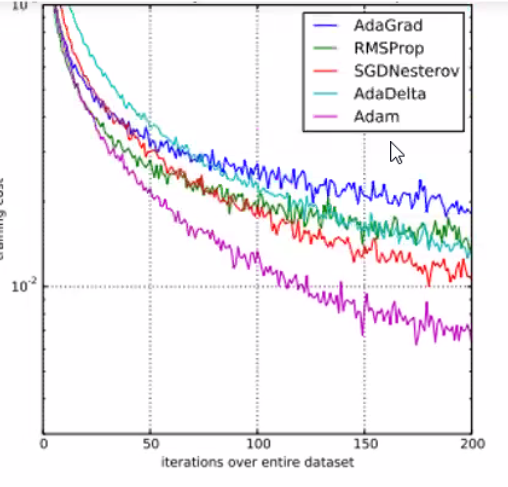

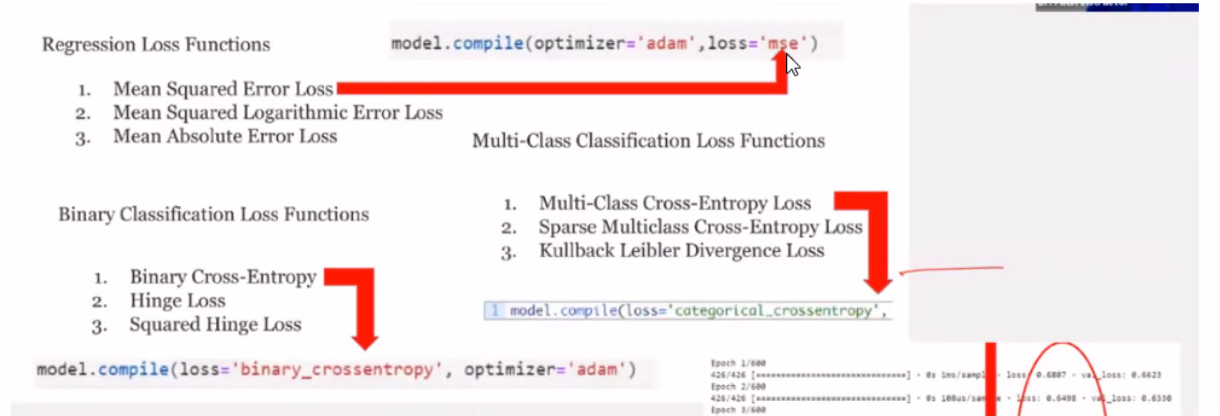

In [ ]:
model.compile(optimizer = "rmsprop", loss = "mse") # son olarak compile edilir. model kuruldu bu model nasıl çalışacak onu burada belirleriz
#optimizer mincost bulur geriye doğru optimize eder. rmsprop veya adam kullanılablir
# loss loss function regression probleminde genelde mse kullanılır 

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [ ]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 300) #250 defa tüm datayı modele sokacak her iterasyonda 32 satır kullandı (batch_size 32) 32 satırın ortalama hata değerini Gradientdecent ile parametreleri backpropogation ile güncelledi bir somraki epoc bu değerler üzerinden train edilecek bütün epoc lar bitene  kadar devam edecek 
#loss değeri  o epoc un en sonuncu değerini verir 
# batch_size için tek tek verilebilir hızlı olur ama doğruluk oranı azalır, yüksek verirsek süre uzar doğruluk oranı artar.datanın tamamı olursa çok yavaş olur fakat çok doğru sonuçlar alınır.
# datanın büyüklüğü ve süreye göre ayarlanır.

Epoch 1/300
22/22 [==============================] - 1s 1ms/step - loss: 256740.0625
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 256674.3750
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 256605.3750
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 256513.5938
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 256409.0000
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 256290.2344
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 256153.2188
Epoch 8/300
22/22 [==============================] - 0s 2ms/step - loss: 255995.3594
Epoch 9/300
22/22 [==============================] - 0s 2ms/step - loss: 255816.0469
Epoch 10/300
22/22 [==============================] - 0s 2ms/step - loss: 255614.3594
Epoch 11/300
22/22 [==============================] - 0s 2ms/step - loss: 255387.2969
Epoch 12/300
22/22 [==============================] - 0s 2ms/st

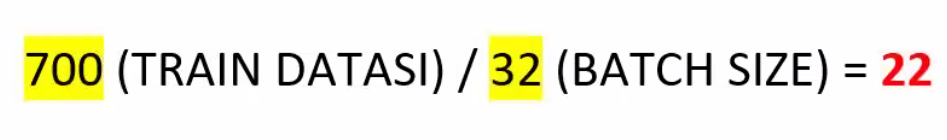

epoch da batch size da biz istediğimiz değerleri vererek deneyebiliriz, yukarıdaki rakamların bir nedenselliği yok. Fakat DL büyük datalarda iyi çalışır, o yüzden çok da küçük paketler haline getirme. 

In [ ]:
model.summary() # her katmanda kaç parametre olduğunu verir 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


![total.JPG](attachment:total.JPG)

![neuron.JPG](attachment:neuron.JPG)

In [ ]:
model.weights #eğitim sonrası ağırlık değerleri

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 1.589277 ,  1.7202065, -1.1195173,  2.5177915],
        [ 3.95943  ,  4.123648 ,  0.6290614,  3.5217693]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.76556456,  0.8187363 , -0.35264117,  0.8330936 ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.08051755, -0.6819179 , -0.3303012 ,  2.6269445 ],
        [-0.07890722,  0.7233902 ,  0.6558978 ,  3.2593288 ],
        [ 0.49909058, -0.18768045,  0.24754596, -0.3587976 ],
        [-0.7285668 , -0.18068369, -0.6237766 ,  2.4948742 ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([-0.07501208, -0.09781808, -0.13282125,  0.8122764 ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 7.0983928e-01,  4.8670158e-02,  1.4577138e-01,  3.0512136e-01],
        [-9.9817383e-01, -3.8158476

In [ ]:
model.history.history # model eğitilirken çıkan loss değerlerini verir

{'loss': [256740.0625,
  256674.375,
  256605.375,
  256513.59375,
  256409.0,
  256290.234375,
  256153.21875,
  255995.359375,
  255816.046875,
  255614.359375,
  255387.296875,
  255133.328125,
  254850.21875,
  254536.796875,
  254186.671875,
  253801.6875,
  253378.8125,
  252914.609375,
  252408.25,
  251855.125,
  251253.34375,
  250600.453125,
  249891.75,
  249131.59375,
  248316.59375,
  247436.296875,
  246490.375,
  245484.390625,
  244407.390625,
  243247.078125,
  242015.65625,
  240718.109375,
  239330.71875,
  237864.1875,
  236311.984375,
  234681.921875,
  232948.140625,
  231121.875,
  229206.953125,
  227190.0625,
  225079.265625,
  222857.171875,
  220537.375,
  218110.234375,
  215559.046875,
  212907.46875,
  210140.25,
  207274.234375,
  204309.03125,
  201202.8125,
  197965.0,
  194635.203125,
  191177.3125,
  187596.109375,
  183915.046875,
  180104.921875,
  176192.921875,
  172157.1875,
  168012.984375,
  163732.609375,
  159389.609375,
  154924.546875,
  15

In [ ]:
pd.DataFrame(model.history.history)

,loss
0,256740.062
1,256674.375
2,256605.375
3,256513.594
4,256409.000
...,...
295,24.036
296,24.470
297,24.225
298,24.547


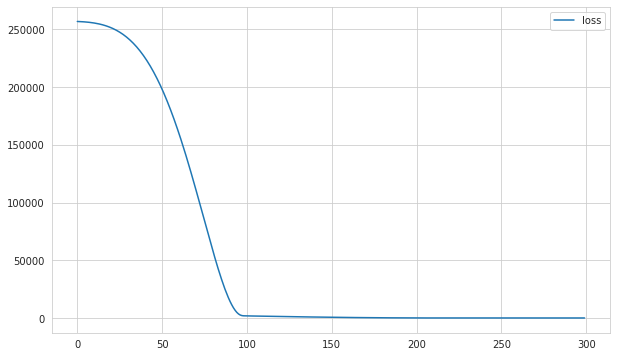

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

(0.0, 3000.0)

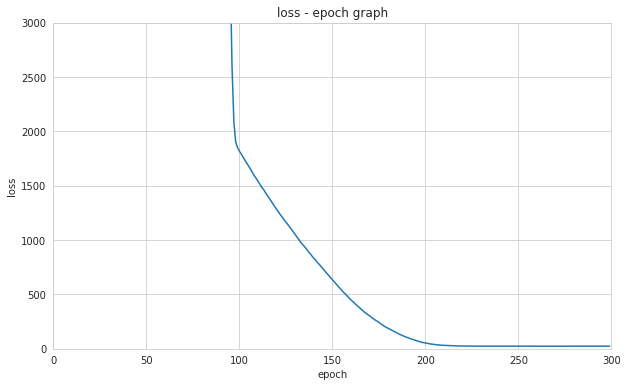

In [ ]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 300]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

![image.png](attachment:image.png)

![performance.jpeg](attachment:performance.jpeg)

## Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [ ]:
model.evaluate(X_train, y_train, verbose=0) # model oluştururken loss'a hangi skoru verdiysem onun sonucunu verir. "mse"
# arka planda x ve y testi predict alıp sonra evaluate sonucunu veriyor

23.739757537841797

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

25.184247970581055

In [ ]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [ ]:
explained_variance_score(y_test, y_pred) # R2 skorunu verir 1 e yakınsa iyidir

0.9971651312654041

In [ ]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

# gerçek ve tahmin değerlerini kıyaslarız
#büyük datalarda  milyonluk datalarda DL modeller tercih edilir 

,Actual,Pred
175,479.569,476.179
19,565.192,566.059
2,582.455,592.684
5,584.381,579.704
192,579.558,588.287
116,580.881,587.066
282,354.929,350.742
296,502.909,515.041
29,412.907,414.402
156,435.098,436.645


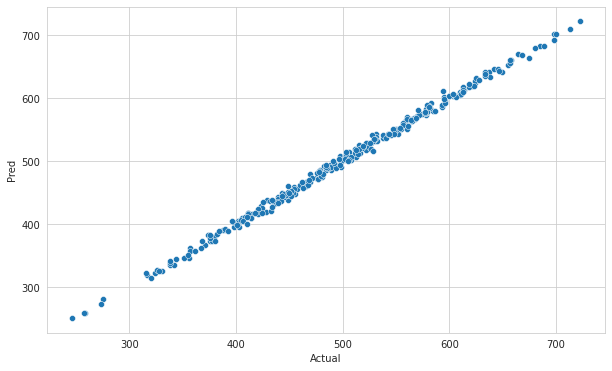

In [ ]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare);

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.9971355595150501 
mae: 4.032957616600546 
mse: 25.184251447369466 
rmse: 5.01839132066935


![image.png](attachment:image.png)

![deploy.jpg](attachment:deploy.jpg)

## Final Model and Model Deployment

In [ ]:
scaler = MinMaxScaler().fit(X)

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 300)

Epoch 1/300
32/32 [==============================] - 1s 2ms/step - loss: 257075.7812
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 256629.2031
Epoch 3/300
32/32 [==============================] - 0s 1ms/step - loss: 256087.8906
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 255419.1875
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 254619.3906
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 253662.5156
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 252520.6406
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 251147.3906
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 249506.7812
Epoch 10/300
32/32 [==============================] - 0s 1ms/step - loss: 247565.4844
Epoch 11/300
32/32 [==============================] - 0s 1ms/step - loss: 245299.1875
Epoch 12/300
32/32 [==============================] - 0s 2ms/st

yukarıdaki gibi save edemeyebilir diye bu aşamada modeli tekrar çalıştırıp kaydetmek tavsiye ediliyor. 

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [ ]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'  DL modelleri .h5 uzantısı ile kaydedilir, en son değerlerini korumasını adına bu uzantı kullanılıyor
# yalnızca DL dosyaları .h5 uzantısı ile biter

![image.png](attachment:image.png)

![fortune-teller-2.jpeg](attachment:fortune-teller-2.jpeg)

## Prediction-1

In [ ]:
from tensorflow.keras.models import load_model # modeli  yükleriz 

In [ ]:
model_fake_reg = load_model('model_fake_reg.h5')

In [ ]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [ ]:
sample = [[998, 1000]]

In [ ]:
sample_scaled = scaler_fake_reg.transform(sample)

In [ ]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 56ms/step


array([[419.45245]], dtype=float32)

![image.png](attachment:image.png)

## Prediction-2

In [ ]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],  # birden fazla değerleride pred yapabiliriz.
           "Feature2": [1000, 999, 998, 997, 996]}   # scale yaptığımızdan array olarak sonuç vereceği için array a çevirmeye gerek yok


In [ ]:
sample = pd.DataFrame(my_dict)
sample


,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [ ]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled


array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [ ]:
model_fake_reg.predict(sample_scaled)


1/1 [==============================] - 0s 16ms/step


array([[379.30225],
       [330.96756],
       [282.63284],
       [234.29822],
       [185.96356]], dtype=float32)

![image.png](attachment:image.png)